In [1]:
import matplotlib.pyplot as plt
# from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Dropout, Dense, Flatten, Reshape
# from keras import backend as K
from loader_corrected import create_dataset, denormalize_3d

import tensorflow as tf


2024-12-14 01:13:57.290263: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-14 01:13:57.320784: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-14 01:13:57.329684: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-14 01:13:57.388847: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


In [3]:
X_train, X_test, y_train, y_test = create_dataset(input_hours=6, output_hours=1)

In [4]:
# Build the LSTM model,
# Building the LSTM model with two LSTM layers and two Dense layers.

# Initializes a linear stack of layers in the model. In a Sequential model, each layer has exact one input tensor and one output tensor.
model = Sequential()

model.add(
  Input(shape=(360, 8))
)

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(60 * 8, activation='relu'))
model.add(Reshape((60, 8)))
model.add(Dense(8))

# Compile the model,
# Compile the model using Adam optimizer and mean squared error as the loss function.
learn_rate = 0.001
# optimizer = tf.keras.optimizers.Adam(learning_rate=learn_rate)
optimizer = tf.keras.optimizers.Lion(learning_rate=learn_rate)
# optimizer = tf.keras.optimizers.Adafactor(learning_rate=learn_rate)

model.compile(
    optimizer=optimizer,
    loss="mean_squared_error",
    metrics=["mean_absolute_error", "mean_squared_error", rmse],
)


# Train the model
num_epochs = 10
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=num_epochs,
    batch_size=64,
    verbose=1,
)

# Predicting and inverse transformation to original prices
# Predicting and transforming predictions back to original scale.
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = denormalize_3d(train_predict)
test_predict = denormalize_3d(test_predict)

I0000 00:00:1734156842.981684  376742 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734156843.341442  376742 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734156843.341558  376742 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734156843.348623  376742 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734156843.348727  376742 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Epoch 1/10


I0000 00:00:1734156852.154958  376855 service.cc:146] XLA service 0x7fee30004980 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734156852.155287  376855 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-12-14 01:14:12.226155: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-14 01:14:12.392476: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101
2024-12-14 01:14:14.410039: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 32 bytes spill stores, 32 bytes spill loads

2024-12-14 01:14:15.079993: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function '

  6/157 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.4343 - mean_absolute_error: 0.5269 - mean_squared_error: 0.4114 - rmse: 0.6338

I0000 00:00:1734156864.916794  376855 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


153/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2568 - mean_absolute_error: 0.4139 - mean_squared_error: 0.2557 - rmse: 0.5001

2024-12-14 01:14:29.731309: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_795', 4 bytes spill stores, 4 bytes spill loads

2024-12-14 01:14:30.006312: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_795', 212 bytes spill stores, 212 bytes spill loads

2024-12-14 01:14:32.614892: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_13', 60 bytes spill stores, 60 bytes spill loads

2024-12-14 01:14:32.648934: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1190', 128 bytes spill stores, 128 bytes spill loads

2024-12-14 01:14:33.391005: I external/local_xla/xla/stream_ex

157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 115ms/step - loss: 0.2546 - mean_absolute_error: 0.4129 - mean_squared_error: 0.2546 - rmse: 0.4990 - val_loss: 0.1177 - val_mean_absolute_error: 0.2788 - val_mean_squared_error: 0.1177 - val_rmse: 0.3420
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0812 - mean_absolute_error: 0.2197 - mean_squared_error: 0.0812 - rmse: 0.2837 - val_loss: 0.0491 - val_mean_absolute_error: 0.1689 - val_mean_squared_error: 0.0491 - val_rmse: 0.2203
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0406 - mean_absolute_error: 0.1467 - mean_squared_error: 0.0406 - rmse: 0.2010 - val_loss: 0.0384 - val_mean_absolute_error: 0.1512 - val_mean_squared_error: 0.0384 - val_rmse: 0.1950
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0290 - mean_absolute_error: 0.1236 - mean_squared_error: 0.0290 - rmse: 0.1697 - val_loss: 0.0243 - val_mean_absolute_error: 0.1094 - val_mean_squared_error: 0.0243 - val_rmse: 0.1545
Epoch 5/10
157/157 ━━━━

2024-12-14 01:14:52.218802: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_62', 4 bytes spill stores, 4 bytes spill loads

2024-12-14 01:14:52.409405: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_62', 148 bytes spill stores, 148 bytes spill loads



314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 358, 64)        │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 89, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 89, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 89, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 89, 128)        │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 89, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5696)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 480)            │     2,734,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 60, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 60, 8)          │            72 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,506,002 (21.00 MB)

 Trainable params: 2,752,936 (10.50 MB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 2,752,938 (10.50 MB)

In [6]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'rmse', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'val_rmse'])

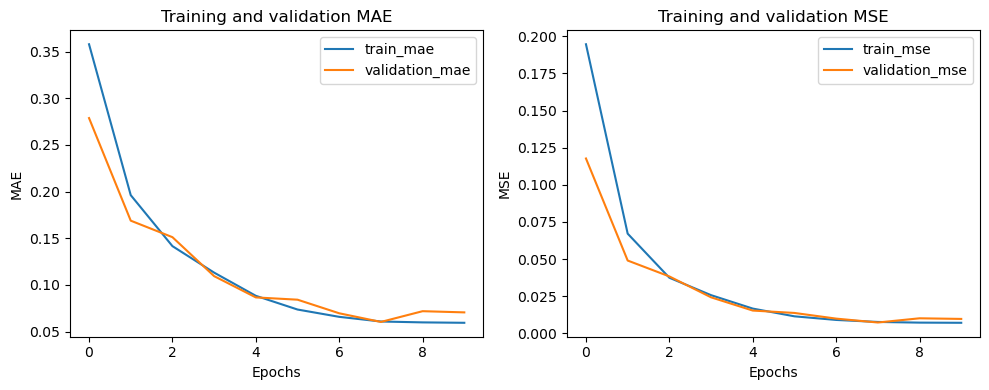

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot training & validation MAE values
ax1.plot(
    range(num_epochs), history.history["mean_absolute_error"], label="train_mae"
)
ax1.plot(
    range(num_epochs),
    history.history["val_mean_absolute_error"],
    label="validation_mae",
)
ax1.set_title("Training and validation MAE")
ax1.set_ylabel("MAE")
ax1.set_xlabel("Epochs")
ax1.legend()

# Plot training & validation MSE values
ax2.plot(
    range(num_epochs), history.history["mean_squared_error"], label="train_mse"
)
ax2.plot(
    range(num_epochs),
    history.history["val_mean_squared_error"],
    label="validation_mse",
)
ax2.set_title("Training and validation MSE")
ax2.set_ylabel("MSE")
ax2.set_xlabel("Epochs")
ax2.legend()

fig.tight_layout()
plt.show()

In [8]:
fig.savefig(f"numEpochs_{num_epochs}-learningRate_{learn_rate}.png")